<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/KMeans_Find_K_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonny Tesfahun
- 07/18/22

1. Use KMeans to create various customer segments.
- Use an Elbow Plot of inertia
- And a plot of Silhouette Scores
- Choose a K based on the results.
2. Submit your notebook below.

##Loading and Cleaning Data

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [113]:
customer = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/cust_seg.csv')
df = customer[{'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'}]
df.head()

,Other Debt,Age,DebtIncomeRatio,Edu,Defaulted,Card Debt,Income,Years Employed
0,1.073,41,6.3,2,0.0,0.124,19,6
1,8.218,47,12.8,1,0.0,4.582,100,26
2,5.802,33,20.9,2,1.0,6.111,57,10
3,0.516,29,6.3,2,0.0,0.681,19,4
4,8.908,47,7.2,1,0.0,9.308,253,31


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Other Debt       850 non-null    float64
 1   Age              850 non-null    int64  
 2   DebtIncomeRatio  850 non-null    float64
 3   Edu              850 non-null    int64  
 4   Defaulted        700 non-null    float64
 5   Card Debt        850 non-null    float64
 6   Income           850 non-null    int64  
 7   Years Employed   850 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [115]:
#checking duplicates
df.duplicated().sum()

0

In [116]:
#checked NaN
df.isna().sum()

Other Debt           0
Age                  0
DebtIncomeRatio      0
Edu                  0
Defaulted          150
Card Debt            0
Income               0
Years Employed       0
dtype: int64

In [117]:
#checking value counts
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [118]:
#droping NaN because less than 17% of the data
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [119]:
#making sure NaN are dropped 
df.isna().sum()

Other Debt         0
Age                0
DebtIncomeRatio    0
Edu                0
Defaulted          0
Card Debt          0
Income             0
Years Employed     0
dtype: int64

##Inertia - Elbow Plot

In [120]:
#setting scaler
scaler = StandardScaler()

In [121]:
# Fit & transform dataframe
scaled_df = scaler.fit_transform(df)

In [122]:
#Creating an empty list of inertias
#Loop through k values between 2 and 11 and store the inertias in the list.
inertias = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

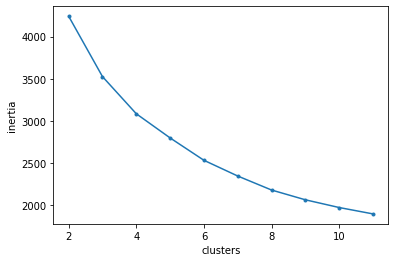

In [123]:
#Visualizing scores
plt.plot(range(2,12), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

1. Elbow Plot of inertia shows that elbow may be between 2 and 3. Thus, the graph starts to level off at those clusters.

##Silhouette Score - KMeans

In [124]:
# Saving silhouette scores for various cluster numbers in list between 2-11
kmeans_silhouette_scores = []
for i in range(2, 12):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  kmeans_silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))


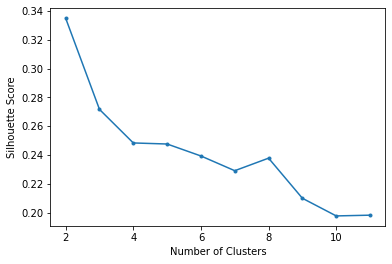

In [125]:
# Visualize scores
plt.plot(range(2, 12), kmeans_silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

1. The Silhouette Score gives another suggestion for clustering than the elbow plot of inertias. This is showing that between 2 and 3 as clusters, 2 is the best option.

##Choosing K based on the Results

In [126]:
#Silhouette score for Cluster 2, Since above data shows that is the best option
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.33496643365707623